#DERS 15- GRADIENT DESCENT ALGORITHM

Bu algoritma, makine öğrenmesi alanında popüler bir yöntemdir, çünkü makine öğrenmesinin amaçlarından biri, eğitim verisi göz önüne alındığında, en yüksek doğruluğu bulmak veya hata oranını en aza indirmektir. Gradyan inişi “maliyet fonksiyonunu“en aza indirgeyerek asgari hatayı bulmak için kullanılır.

Öğrenme Katsayısı (α) Seçme:
- Küçük α – yavaş yakınsama
- Büyük α –ileri geri yakınsama
- İyi bir α seçmek için, birkaç α değerini denemek lazım
Bu değerler için, dereceli azaltma metodunu çalıştırıp performansını incelemek lazım

In [ ]:
# Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Increase Visualizer
plt.rcParams['figure.figsize'] = [15,7]

In [ ]:
# Veri setini nereye kaydettiyseniz o adresin dosya yolunu read_csv metoduna geçiyoruz.
dataset = pd.read_csv("Housing_Data.csv", encoding = "utf-8")
dataset.head()

,Size(Sq. Ft),Price
0,477,50367
1,496,61683
2,524,63517
3,571,63755
4,770,66702


In [ ]:
indepX = dataset.iloc[:,[0]].values #dataframe'in 0 index'li kolonunu bir array olarak başka bir değişkene atayabiliriz.
depY = dataset.iloc[:,[1]].values #dataframe'in 1 index'li kolonunu bir array olarak başka bir değişkene atayabiliriz.
indepX

array([[ 477],
       [ 496],
       [ 524],
       [ 571],
       [ 770],
       [ 785],
       [ 795],
       [ 796],
       [ 826],
       [ 834],
       [ 908],
       [ 909],
       [ 968],
       [ 972],
       [1049],
       [1399],
       [1560],
       [1589],
       [1773],
       [1773],
       [1830],
       [1941],
       [2116],
       [2131],
       [2190],
       [2227],
       [2273],
       [2353],
       [2373],
       [2463],
       [2520],
       [2563],
       [2688],
       [2739],
       [2765],
       [2835],
       [2916],
       [2946],
       [3102],
       [3117],
       [3370],
       [3442],
       [3443],
       [3444],
       [3470],
       [3578],
       [3595],
       [3644],
       [3931],
       [3970]])

In [ ]:
# Hatırlayacağınız üzere lineer regresyonda verinin standardize edilmesi gerekiyordu.
from sklearn.preprocessing import StandardScaler
scale =  StandardScaler() # Hem x bağımsız değişkeni hem de y bağımlı değişkenini stardize ediyoruz.
indepX = scale.fit_transform(indepX)
depY = scale.fit_transform(depY)

# Veriyi train ve test olarak iki parçaya bölüyoruz.
from sklearn.model_selection import train_test_split
indepX_train, indepX_test, depY_train, depY_test = train_test_split(indepX, depY, 
                                                                    test_size = 0.3, 
                                                                    random_state = 42)

In [ ]:
# Regreson fonksiyonumuz y = theta (intercept) + theta1 * x gibi bir denklem olacak.

def hyp(theta, x):
    return theta[0] + theta[1] * x

In [ ]:
# Error/Cost Function

def errorFunc(theta, indepX, depY):
    
    # m training set'teki satır sayısıdır.
    m = len(indepX)
    error = 0
    for i in range(m): # her bir veri için actual - predicted hesaplayıp toplamını alacağız.
        
        x = indepX[i]
        y = depY[i]
        error += (y - (theta[1] * x + theta[0])) ** 2
        
    return error / (2*m) # sonunda Kareli hata toplamlarının ortalaması alınır.

In [ ]:
# Grad fonksiyonu 1 iterasyon yeni katsayıları günceller.

def grad(indepX, depY, curr_theta, learning_rate):

    # curr_theta bizim belirleyeceğimiz başlangıç katsayılarını içeren listedir.
    grad = np.zeros(2) # grad, hem theta 1 hem de theta 2 için türev değerlerini tutan listedir.
    new_theta = curr_theta
    m = len(indepX)
    
    # Adjustments
    for i in range(m): 
        
        # her bir x ve y değeri aşağıdaki denklemlerde yerine konur ve katsayıların hatalar üzerindeki etkisi ölçülür.
        
        x = indepX[i]
        y = depY[i]
        
        grad[0] += (-1/m) * (y - (curr_theta[0] + (curr_theta[1] * x) )) #theta 0'a göre türevi alınmış cost function
        grad[1] += (-1/m) * x * (y - (curr_theta[0] + (curr_theta[1] * x))) #theta 1'a göre türevi alınmış cost function
    
    temp0 = curr_theta[0] - (learning_rate * grad[0]) #learning rate ile theta 0 için gradient'in hesaplanması
    temp1 = curr_theta[1] - (learning_rate * grad[1]) ##learning rate ile theta 1 için gradient'in hesaplanması
    
    new_theta[0] = temp0 # theta 0 ve theta 1'in yeni değerlerine güncellenmesi.
    new_theta[1] = temp1
    
    return new_theta

In [ ]:
# Gradient Descent Function

def gradientDescent(indepX,depY, init_theta, learning_rate, num_iterations):
    
    # Initialization
    theta = init_theta # bizim belirlediğimiz başlangıç katsayıları
    J = [0 for i in range(num_iterations)] # iterasyon sayısı kadar sıfır içeren cost function listesi

    # Optimizasyonun yapıldığı kısım.
    for i in range(num_iterations):
        
        theta = grad(indepX, depY, theta, learning_rate)
        J[i] = errorFunc(theta, indepX, depY)
        
    return theta, J #optimum theta'ları ve iterasyon boyunca cost function'un aldığı değerleri dönen J değişkenini alırız.

In [ ]:
# Main Function

def main():
    
    # Initialization
    init_theta = np.zeros(2) # başlangıç katsayıları 0,0 olarak atanmıştır.
    learning_rate = 0.05 # learning rate 0.05
    num_iterations = 100 # 100 iterasyon gradient descent algoritması çalıştırılacaktır.
    
    H = [0 for i in range(len(indepX_train))]
    J = [0 for i in range(num_iterations)]
    
    # Gradient Descent'i çağırmak
    theta, J = gradientDescent(indepX_train, depY_train, init_theta, learning_rate, num_iterations)
    # Regresyon denkleminde katsayıları ve training set'i yerine koyalım.
    H = hyp(theta, indepX_train) 
      
    # Visualize J
    plt.plot(J, color = 'green')
    plt.title('Error vs No.Itrerations')
    plt.xlabel('Itrerations')
    plt.ylabel('Cost Function')
    plt.show()
    
    # Visualize H
    plt.scatter(indepX_train, depY_train, color = 'red')
    plt.plot(indepX_train, H, color = 'blue')
    plt.title('Size vs Price (Training set)')
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.show()

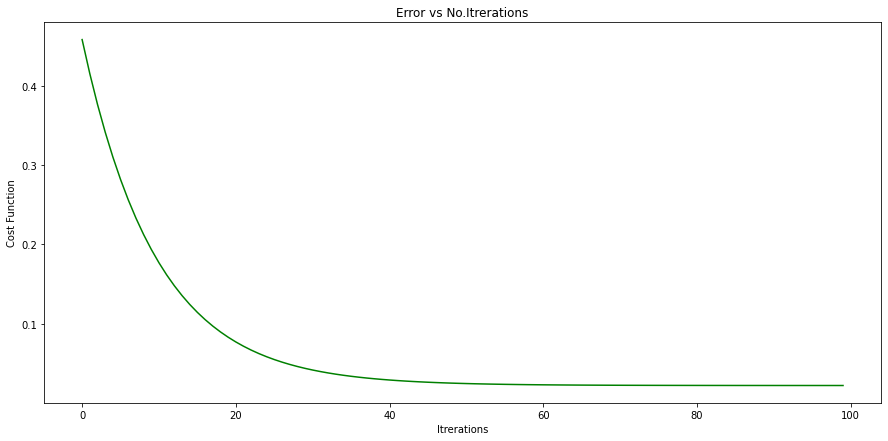

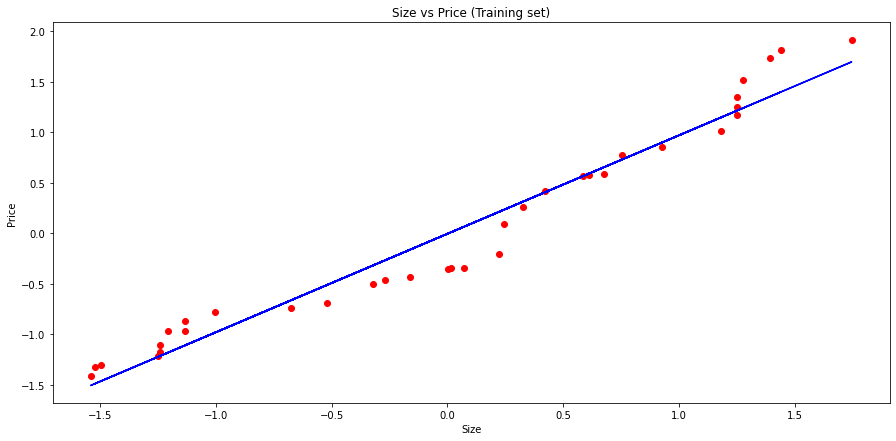

In [ ]:
if __name__ == '__main__':
    main()